# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
# Tarefa 2

# 2, i) Criando função que categoriza latitude
def categorizar_latitude(lat):
    if lat > -10.5:
        return 'Acima de -10.5'
    else:
        return 'Abaixo de -10.5'


In [8]:
# 2, ii) Vendo colunas numéricas para pegar uma que ainda não foi utilizada
sinasc_raw.select_dtypes(include=['Int64'])

,ORIGEM,CODMUNNASC,LOCNASC,IDADEMAE,CODMUNRES,CONSULTAS,PESO,NUMEROLOTE,DIFDATA,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,110001,1,19,110001,4,3685,20190004,17,0,1,1,1,0,5,1
1,1,110001,1,29,110001,4,3055,20190004,15,0,1,1,5,1,5,2
2,1,110001,1,37,110001,4,3460,20190004,11,0,1,1,7,1,5,3
3,1,110001,1,30,110037,3,2982,20190005,20,0,1,1,2,0,4,4
4,1,110001,1,30,110001,4,3310,20190005,17,0,1,1,5,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,510340,1,32,110030,4,2110,20200044,305,0,1,1,7,1,5,2767632
27024,1,510675,1,19,110092,4,3310,20190038,17,0,1,1,1,0,5,2772678
27025,1,510787,1,24,110030,4,3065,20190025,5,0,1,1,3,1,5,2776905
27026,1,510787,1,21,110030,4,2352,20200003,15,0,1,1,10,1,5,2777105


Iremos analisar as colunas 'Peso' e 'DIFDATA'.

In [12]:
# 2, iii) Aplicando o mapping pra classificar as faixas de latitude
sinasc_raw['LATITUDE'] = sinasc_raw['munResAlt'].map(categorizar_latitude)
sinasc_raw.LATITUDE

0        Acima de -10.5
1        Acima de -10.5
2        Acima de -10.5
3        Acima de -10.5
4        Acima de -10.5
              ...      
27023    Acima de -10.5
27024    Acima de -10.5
27025    Acima de -10.5
27026    Acima de -10.5
27027    Acima de -10.5
Name: LATITUDE, Length: 27028, dtype: object

In [13]:
# 2, iii) Criando o DataFrame agrupado
sinasc_raw.groupby('LATITUDE').agg(
    {
        'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
        'DIFDATA': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
    }
)

PESO                                               \
                      sum         mean   min   max  median         std   
LATITUDE                                                                 
Abaixo de -10.5      3215  3215.000000  3215  3215  3215.0         NaN   
Acima de -10.5   87653742  3243.191697   258  5985  3270.0  544.764148   

                               DIFDATA                                        \
                           var     sum       mean min  max median        std   
LATITUDE                                                                       
Abaixo de -10.5            NaN      36  36.000000  36   36   36.0        NaN   
Acima de -10.5   296767.976608  869332  32.165316   1  652   28.0  25.461619   

                             
                        var  
LATITUDE                     
Abaixo de -10.5         NaN  
Acima de -10.5   648.294064

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [15]:
# 2) Criando faixa de município por área
# 2, i) Função para categorizar a área
def categorizar_area(area):
    if area > 3000:
        return 'Acima de 3000m'
    else:
        return 'Abaixo de 3000m'
    
# 2, ii) Criar uma coluna de área mapeada com a função que criamos:
sinasc_raw['AREA'] = sinasc_raw['munResArea'].map(categorizar_area)

# 2, iii) Criar o dataframe agrupado
sinasc_raw.groupby('AREA').agg(
    {
        'PARIDADE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
        'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
    }
)

PARIDADE                                               \
                     sum      mean min max median       std       var   
AREA                                                                    
Abaixo de 3000m     3363  0.644253   0   1    1.0  0.478785  0.229235   
Acima de 3000m     14172  0.649853   0   1    1.0  0.477027  0.227554   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
AREA                                                                    
Abaixo de 3000m     19521  3.739655   1   9    4.0  0.608617  0.370414  
Acima de 3000m      77142  3.537326   1   9    4.0  0.820967  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

Mínimo de latitude: -13.5, e máximo de latitude: -8.77
A latitude média é de -10.38.


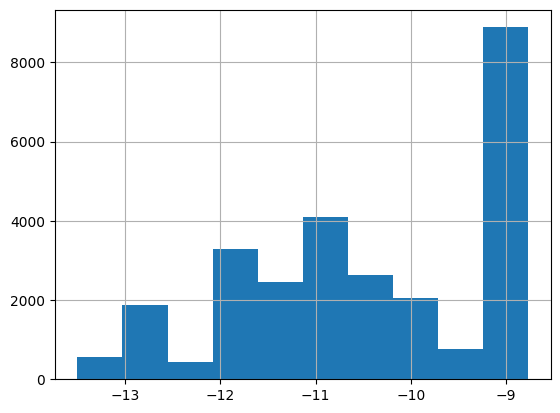

In [26]:
# 3, i) Visualizando um histograma das latitudes pra criar uma nova classificação de latitude
sinasc_raw.munResLat.hist()
minimo_lat = sinasc_raw.munResLat.min()
maximo_lat = sinasc_raw.munResLat.max()
media_lat = sinasc_raw.munResLat.mean()


print(f'Mínimo de latitude: {minimo_lat.round(2)}, e máximo de latitude: {maximo_lat.round(2)}')
print(f'A latitude média é de {media_lat.round(2)}.')

In [35]:
# 3, i) Criando uma função pra classificar latitude
def categorizar_latitude_nova(lat):
    if lat > -10.38:
        return "Latitude acima da média"
    else:
        return "Latitude abaixo da média"
    
# 3, ii) Criando uma coluna mapeada
sinasc_raw['LATITUDE_MEDIA'] = sinasc_raw['munResLat'].map(categorizar_latitude_nova)

# 3, iii) Criando o dataframe argupado
sinasc_raw.groupby('LATITUDE_MEDIA').agg(
    {
        'CODPAISRES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
        'STDNEPIDEM': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    }
)

CODPAISRES                               STDNEPIDEM  \
                                sum mean min max median  std  var        sum   
LATITUDE_MEDIA                                                                 
Latitude abaixo da média      14388  1.0   1   1    1.0  0.0  0.0          0   
Latitude acima da média       12640  1.0   1   1    1.0  0.0  0.0          0   

                                                        
                         mean min max median  std  var  
LATITUDE_MEDIA                                          
Latitude abaixo da média  0.0   0   0    0.0  0.0  0.0  
Latitude acima da média   0.0   0   0    0.0  0.0  0.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [36]:
# 4, I) Regiões imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

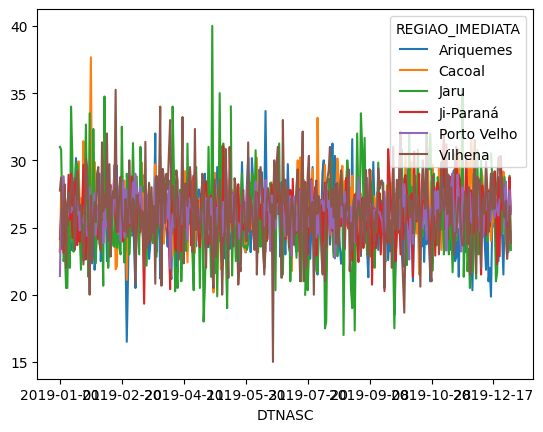

In [48]:
# 4, ii) Mapear as regiões imediatas
sinasc_raw['REGIAO_IMEDIATA'] = sinasc_raw['munResNome'].map(imediatas)
idade_media = sinasc_raw.groupby(['DTNASC', 'REGIAO_IMEDIATA'])['IDADEMAE'].mean().reset_index()
plot = idade_media.pivot(index='DTNASC', columns='REGIAO_IMEDIATA', values='IDADEMAE').plot()

plt.show(plot)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


Para facilitar, usaremos um DataFrame que já nos trás os dados de IDH, IFDM e PIB de cada município, disponível em: [https://drive.google.com/file/d/1YJjpX40oJ_tL6NOodYFsAW-gU6It4ptk/view].
Caso não fôssemos usar esses dados, faríamos manualmente o mapping criando dicionários de mapeamento.

In [62]:
# 5, i) Importando as estatísticas de cada região
df_dados_regioes_imediatas = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin1')
df = df_dados_regioes_imediatas
df.columns

Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [59]:
# 5.1, i) Criando o categorizador de IDH:
def categorizar_idh(idh):
    if idh >= 0.700:
        return 'Alto'
    elif idh < 700 and idh >= 600:
        return 'Medio'
    else:
        return 'Baixo'

In [85]:
# 5.1, ii) Criando uma coluna de IDH
df['idh_classificacao'] = df['idh'].map(categorizar_idh)

# 5.1, iii) IDH Alto e Baixo POR MUNICÍPIOS
idh_rondonia = df.groupby('idh_classificacao').size().reset_index(name='Contagem de Municípios')
idh_rondonia

,idh_classificacao,Contagem de Municípios
0,Alto,7
1,Baixo,45


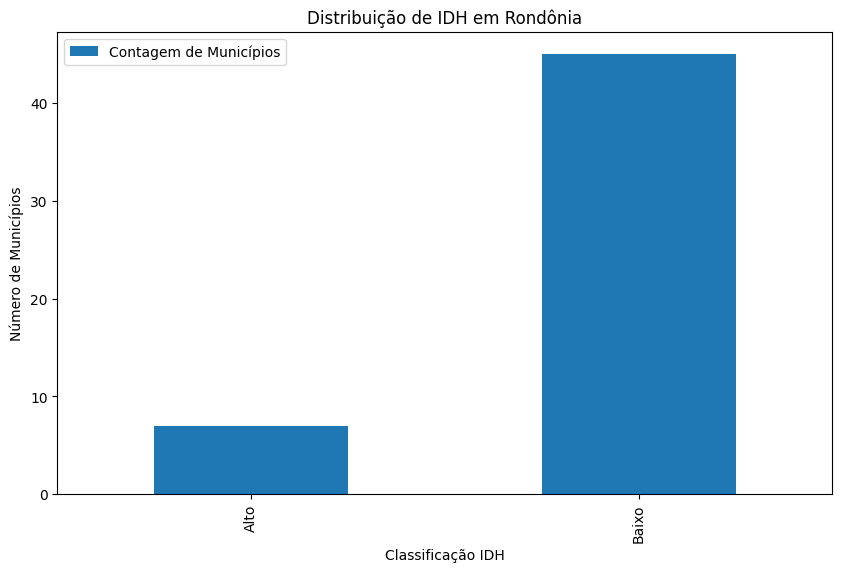

In [93]:
# 5.1, iv) Analisando o idh de Rondônia graficamente
idh_rondonia.plot(
    kind='bar',
    title='Distribuição de IDH em Rondônia',
    figsize=(10, 6),
    xlabel='Classificação IDH',
    ylabel='Número de Municípios',
)

plt.xticks([0, 1], ['Alto', 'Baixo'])
plt.show()

In [96]:
# 5.1, vi) Percentual
idh_rondonia['Percentual'] = (idh_rondonia['Contagem de Municípios'] / len(df)).round(2)
idh_rondonia

,idh_classificacao,Contagem de Municípios,Percentual
0,Alto,7,0.13
1,Baixo,45,0.87


# Insights sobre IDH em Rondônia

**Principais descobertas**
- 87% dos municípios de Rondônia possuem IDH classificado como **BAIXO** (< 0.600)
- Apenas 13% dos municípios atingem classificação **ALTO** em IDH

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [97]:
# 5.2, i) Criando o categorizador de IFDM:
def categorizar_ifdm(ifdm):
    if ifdm >= 0.8:
        return 'Alto'
    elif ifdm < 0.6 and ifdm <=0.8:
        return 'Moderado'
    elif ifdm < 0.4 and ifdm <= 0.6:
        return 'Regular'
    else:
        return 'Baixo'

In [99]:
# 5.2, ii) Criando uma coluna de IFDM categorizada
df['ifdm_classificacao'] = df['ifdm'].map(categorizar_ifdm)

# 5.2, iii) IFDM Alto e Baixo, por municípios
ifdm_rondonia = df.groupby('ifdm_classificacao').size().reset_index(name='Contagem de Municípios')
ifdm_rondonia

,ifdm_classificacao,Contagem de Municípios
0,Baixo,26
1,Moderado,26


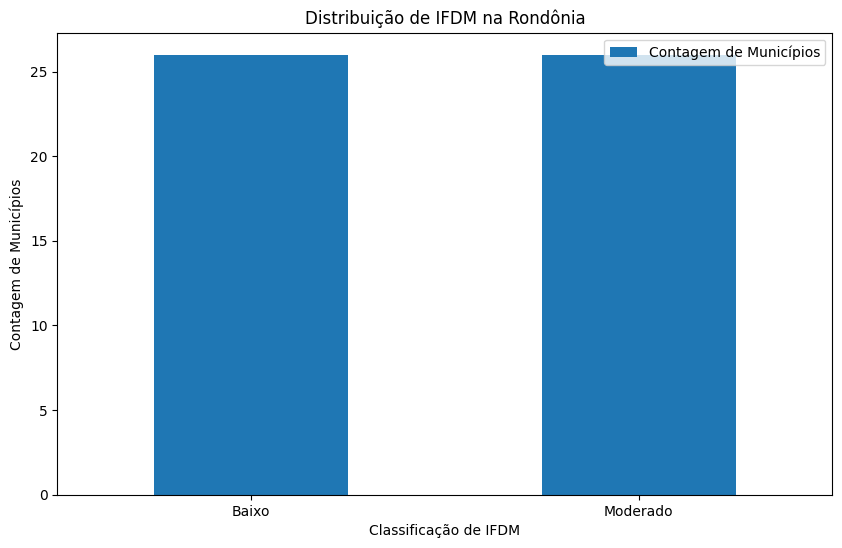

In [ ]:
# 5.1, iv) Analisando o ifdm graficamente
ifdm_rondonia.plot(
    kind='bar',
    title='Distribuição de IFDM na Rondônia',
    figsize=(10, 6),
    xlabel='Classificação de IFDM',
    rot=0, # Deixar na horizontal!
    ylabel='Contagem de Municípios'
)
plt.xticks([0, 1], ['Baixo', 'Moderado'])
plt.show()

# Insights sobre IFDM em Rondônia

**Principais descobertas**
- Os municípios de Rondônia só possuem duas classificações de IFDM: Baixo e Moderado, divididas igualmente entre os municípios.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [119]:
# 5.3, i) Categorizando o PIB
def categorizador_PIB (pib):
    if pib >= 1000000:
        return 'Acima de 1 bilhão'
    elif 1000000 > pib >= 500000:
        return 'Acima de 500 milhões'
    elif 500000 > pib >= 300000:
        return 'Acima de 300 milhões'
    elif 300000 > pib >= 200000:
        return 'Acima de 200 milhões'
    elif 200000 > pib >= 100000:
        return 'Acima de 100 milhões'
    else: 
        return 'Até 100 milhões'

In [134]:
# 5.3, ii) Criando uma coluna para o PIB
df['PIB_categorizado'] = df['pib'].map(categorizador_PIB)

# 5.3, iii) Criando o agrupamento para as faixas do PIB
pib = df.groupby(['PIB_categorizado']).size().reset_index(name='Contagem de Municípios')
pib

,PIB_categorizado,Contagem de Municípios
0,Acima de 1 bilhão,8
1,Acima de 100 milhões,16
2,Acima de 200 milhões,4
3,Acima de 300 milhões,7
4,Acima de 500 milhões,9
5,Até 100 milhões,8


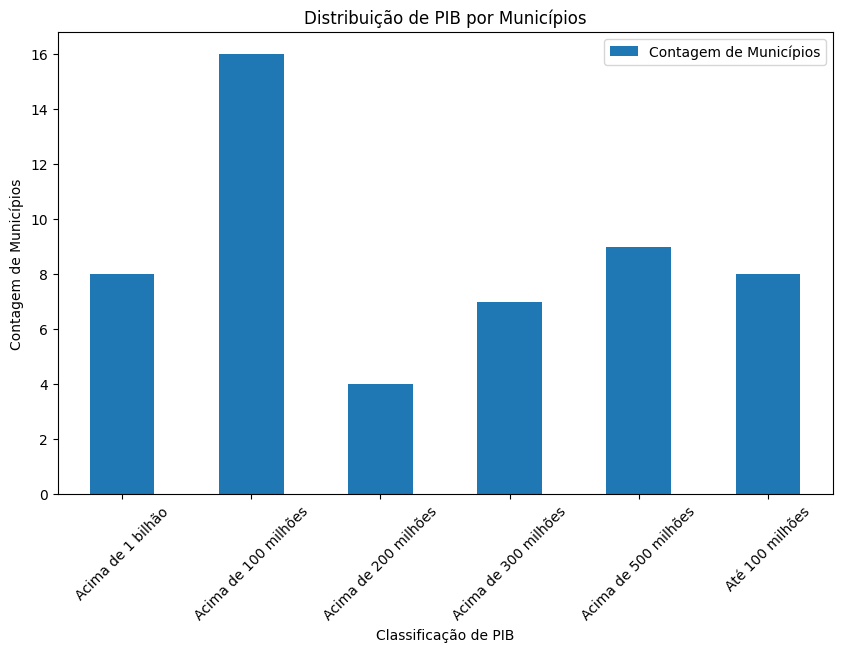

In [135]:
# 5.3, iv) Gráfico
pib.plot(
    kind='bar',
    title='Distribuição de PIB por Municípios',
    figsize=(10, 6),
    xlabel='Classificação de PIB',
    rot=45,
    ylabel='Contagem de Municípios'
)

plt.xticks([0, 1, 2, 3, 4, 5], [
    'Acima de 1 bilhão',
    'Acima de 100 milhões',
    'Acima de 200 milhões',
    'Acima de 300 milhões',
    'Acima de 500 milhões',
    'Até 100 milhões'
    ])
plt.show()

# Insights sobre PIB em Rondônia

**Principais descobertas**
- Os municípios de Rondônia normalmente possuem PIB acima de 100 milhões, enquanto o resto dos municípios são bem distribuídos.

# Respostas Encontradas e Conclusão
Com base nas análises da atividade, conseguimos com clareza identificar e observar problemas que os municípios de Rondônia parecem possuir relacionados com métricas de 'qualidade de vida' e de renda básica como IDH e PIB. Os municípios de rondônia geralmente possuem IDH baixo, a maioria dos dados de IFDM são baixos e moderados, e o PIB bem distribuido.

Para isso, nós utilizamos de ferramentas como `df.groupby` para agrupar dados, e também utilizamos do conceito de `mapping` para mapear dados, criando 'faixas' ou categorias para os dados e filtrando com base nessas categorias.
Esse método de mapeamento para os dados será muito relevante no futuro, especialmente em `feature engineering`, quando devemos escolher quais features iremos usar para classificar nosso modelo, e podemos precisar criar novas features transformando dados numéricos em categóricos (essencialmente 'criando faixas' para os dados e poder analisá-los como se fossem variávels categóricas)

**Observação:** Os dados do PIB na Wikipedia não estão em "bilhão", então pra bater com os dados da Wikipedia iremos mudar diretamente na função que categoriza o PIB para reduzir 3 casas decimais. Essa provavelmente não é a melhor forma de solucionar isso.